Report by: Piyush Mishra

# Introduction

In the first section of the practical sessions, we look at two different kinds of continuous dynamical systems: the phaarmco-kinetics dynamics and the voltage dynamics in a series RLC circuit. We seek to observe the behaviours of these dynamics, model and find approximate solutions.

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

# Pharmaco-kinetics

Considering the following compartment model for the dynamics of a drug inside the body:

$$ Q_a'(t) = -k_aQ_a(t) $$
$$ Q'(t) = -k_eQ(t) + k_aQ_a(t) $$

with $k_a > 0$ and $k_e \geq 0$

Here, the drug is administered orally. The drug is absorbed by the stomach, following which, it is eliminated by the organism after the detection of its presence in the blood. $Q_a(t)$ is the quantity of the drug in the stomach and $Q(t)$ is the quantity of the drug in the blood.

## Equilibrium Points

Finding the equilibrium points of the Pharmaco-kinetics system with $k_a = 2$ and $k_e = 1$.

In [2]:
ka = 2
ke = 1

In [3]:
def Mat(ka, ke):
    A = np.array([[-ka, 0],
                 [ka, -ke]])
    return A

In [4]:
A = Mat(ka, ke)
b = np.zeros(2)
y = np.linalg.solve(A, -b)
y

array([0., 0.])

So, the equilibrium points are $(0, 0)$

## Approximate Solutions

### Solving for $Q_a$

In [5]:
D = 10

t0 = 0
T = 10
dt = 0.05
tt = np.arange(t0, T, dt)

In [6]:
def fa(y, t, ka):
    z = -ka * y
    return z

In [7]:
y0 = D
Qa = spi.odeint(fa, y0, tt, args = (ka,))

Text(0, 0.5, '$Q_a$')

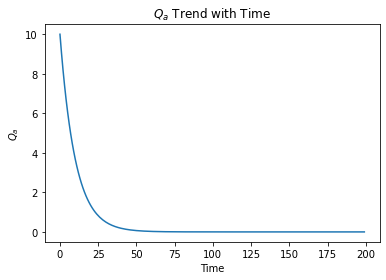

In [8]:
plt.plot(Qa)
plt.title("$Q_a$ Trend with Time")
plt.xlabel("Time")
plt.ylabel("$Q_a$")

We observe that $Q_a(t)$ drastically drops to converge at 0. Biologically, this makes sense since at some point in time, the drug would leave the stomach to be assimilated into the bloodstream.

### Solving the Entire System

In [9]:
Y = [10, 0]

def pharmacol(Y, t, ka, ke):
    Qa = Y[0]
    Q = Y[1]
    
    A = Mat(ka, ke)
    Z = np.dot(A, Y)
    
    return Z

In [10]:
y_ = spi.odeint(pharmacol, Y, tt, args=(ka,ke))

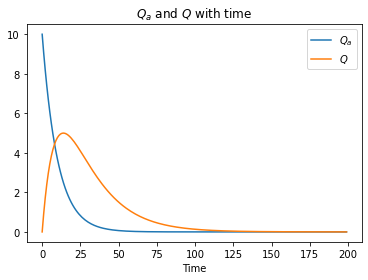

In [11]:
plt.plot(y_)
plt.title("$Q_a$ and $Q$ with time")
plt.xlabel("Time")
plt.legend(["$Q_a$", "$Q$"])

* Here we observe that once the drug starts to leave the stomach (blue), the concentration of the drug in the bloodstream starts increasing. This quantity attains a maximum and converges at 0, because the body is eliminating the drug. We notice that the convergence for the drug concentration in the bloodstream at 0 is later than it is for the drug concentration in the stomach. This also makes sense since at an elementary level, both the processes are sequential.
* Behaviour of the curves: We notice that the $Q_a$ curve attracts the $Q$ curve, which is understandable since there is a positively associated term of $Q_a$ in the dynamics of $Q$.

## Different values of $k_e$

In [12]:
y_1 = spi.odeint(pharmacol, Y, tt, args=(ka,0))
y_2 = spi.odeint(pharmacol, Y, tt, args=(ka,1))
y_3 = spi.odeint(pharmacol, Y, tt, args=(ka,2))
y_4 = spi.odeint(pharmacol, Y, tt, args=(ka,5))
y_5 = spi.odeint(pharmacol, Y, tt, args=(ka,10))

Text(0.5, 0, 'Time')

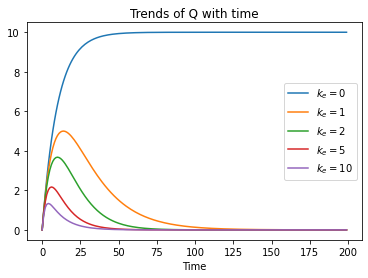

In [13]:
plt.plot(y_1[:,1])
plt.plot(y_2[:,1])
plt.plot(y_3[:,1])
plt.plot(y_4[:,1])
plt.plot(y_5[:,1])
plt.legend(["$k_e=0$","$k_e=1$","$k_e=2$","$k_e=5$","$k_e=10$"])
plt.title("Trends of Q with time")
plt.xlabel("Time")

For $k_e = 0$, we have a plot that increases and converges at $10$. This is not the case for $k_e \neq 0$: $Q$ attains a peak and falls to converge again at $0$. As $k_e$ increases, the peak becomes lower and the drug expulsion is attained earlier.

* Biologically, when $k_e = 0$, it means that $Q(t)$ does not have any importance in the behaviour, i.e. the drug cannot be eliminated, which is why it attains a maximum at $10 (D)$.
* Mathematically, the restriction during the definition for $k_e$ is set to $k_e \geq 0$. So, when $ke = 0$, besides $(0,0)$ we have another infinite set of attractors $(0, Y)$.

# RLC Circuit

An RLC circuit is an electrical circuit consisting of a resistor (R), an inductor (L), and a capacitor (C), connected in series (in this case). The circuit forms a harmonic oscillator for current and the voltage across a capacitor, and resonates at a specific frequency.

The dynamics of the voltage across the capacitor is:
$$ y''(t) + \frac{R}{L}y'(t) + \frac{1}{LC}y(t) = E(t) $$

## Solution Curves and Trajectories

We study the dynamics with two initial data: $(y(0), y'(0)) = (1, 0)$ and $(y(0), y'(0)) = (-1, 0)$

In [14]:
def Mat(R, L, C, E):
    A = np.array([[0, 1],
                 [-1/(L*C), -R/L]])
    b = np.array([0,E])
    return A, b

In [15]:
E = 0
R = 0.3
L = 0.8
C = 1

t0 = 0
T = 50
dt = 0.1
tt = np.arange(t0, T, dt)

Mat(R,L,C,E)

(array([[ 0.   ,  1.   ],
        [-1.25 , -0.375]]),
 array([0, 0]))

In [16]:
def RLC_circuit(Y, t, R, L, C, E):
    A, b = Mat(R, L, C, E)
    return np.dot(A, Y) + b

In [17]:
Y1 = [1, 0]
Y2 = [-1, 0]

In [18]:
y_1 = spi.odeint(RLC_circuit, Y1, tt, args=(R,L,C,E))
y_2 = spi.odeint(RLC_circuit, Y2, tt, args=(R,L,C,E))

### Solution Curves

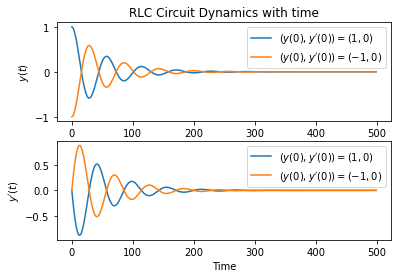

In [19]:
plt.subplot(211)
plt.plot(y_1[:, 0])
plt.plot(y_2[:, 0])
plt.xlabel("Time")
plt.ylabel("$y(t)$")
plt.title("RLC Circuit Dynamics with time")
plt.legend(["$(y(0), y'(0)) = (1, 0)$", "$(y(0), y'(0)) = (-1, 0)$"])

plt.subplot(212)
plt.plot(y_1[:, 1])
plt.plot(y_2[:, 1])
plt.xlabel("Time")
plt.ylabel("$y'(t)$")
plt.legend(["$(y(0), y'(0)) = (1, 0)$", "$(y(0), y'(0)) = (-1, 0)$"])

### Solution Trajectories

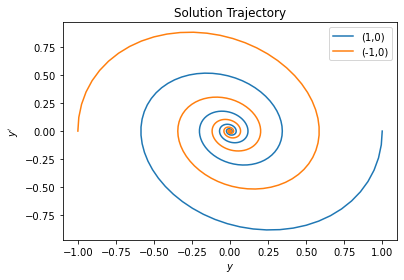

In [20]:
plt.plot(y_1[:,0], y_1[:,1])
plt.plot(y_2[:,0], y_2[:,1])
plt.title("Solution Trajectory")
plt.xlabel("$y$")
plt.ylabel("$y'$")
plt.legend(["(1,0)", "(-1,0)"])

We observe that $(0,0)$ is the point of equilibrium for the dynamics, but this equilibrum is reached through diminishing oscillations over time. This is because of the emergence of the $sine$ and the $cosine$ terms in the complex roots of the system.

## Phase Portrait

In [21]:
xmin = -1; xmax = 1
ymin = xmin; ymax = xmax

xx = np.linspace(xmin, xmax, 20)
yy = xx
XX, YY = np.meshgrid(xx, yy)
FX = 0 * XX
FY = 0 * YY
n, p = np.shape(XX)

for i in range(n):
    for j in range(p):
        Z = RLC_circuit([XX[i, j], YY[i, j]], 0, R, L, C, E)
        FX[i, j] = Z[0]
        FY[i, j] = Z[1]

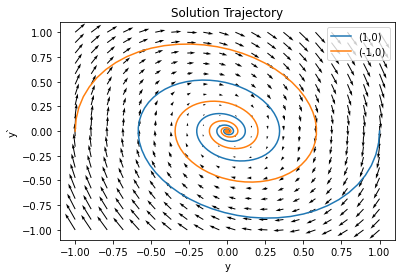

In [22]:
plt.quiver(XX, YY, FX, FY)
plt.plot(y_1[:,0], y_1[:,1])
plt.plot(y_2[:,0], y_2[:,1])
plt.title("Solution Trajectory")
plt.xlabel("y")
plt.ylabel("y`")
plt.legend(["(1,0)", "(-1,0)"])

## Comparing for different $R$ values

In [23]:
y_1 = spi.odeint(RLC_circuit, Y1, tt, args=(0,L,C,E))
y_2 = spi.odeint(RLC_circuit, Y1, tt, args=(0.3,L,C,E))
y_3 = spi.odeint(RLC_circuit, Y1, tt, args=(1,L,C,E))
y_4 = spi.odeint(RLC_circuit, Y1, tt, args=(5,L,C,E))

### Solution Curves

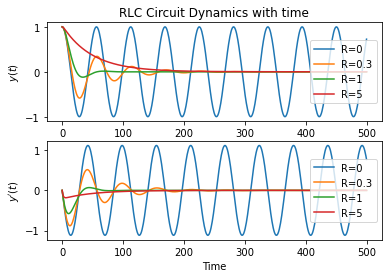

In [24]:
plt.subplot(211)
plt.plot(y_1[:, 0])
plt.plot(y_2[:, 0])
plt.plot(y_3[:, 0])
plt.plot(y_4[:, 0])
plt.title("RLC Circuit Dynamics with time")
plt.xlabel("Time")
plt.ylabel("$y(t)$")
plt.legend(["R=0","R=0.3","R=1","R=5"], loc="right")

plt.subplot(212)
plt.plot(y_1[:, 1])
plt.plot(y_2[:, 1])
plt.plot(y_3[:, 1])
plt.plot(y_4[:, 1])
plt.xlabel("Time")
plt.ylabel("$y'(t)$")
plt.legend(["R=0","R=0.3","R=1","R=5"], loc="right")

### Solution Trajectories

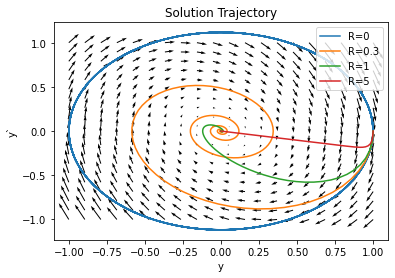

In [25]:
plt.quiver(XX, YY, FX, FY)
plt.plot(y_1[:,0], y_1[:,1])
plt.plot(y_2[:,0], y_2[:,1])
plt.plot(y_3[:,0], y_3[:,1])
plt.plot(y_4[:,0], y_4[:,1])
plt.title("Solution Trajectory")
plt.xlabel("y")
plt.ylabel("y`")
plt.legend(["R=0","R=0.3","R=1","R=5"])

When $R=0$, the dynamics becomes, assuming $E(t)=0$:

$$ \frac{d^2y}{dt^2} = -\frac{1}{LC}y $$

This is analogous to the simple harmonic motion dynamics:

$$ \frac{d^2y}{dt^2} = -\omega_0^2y $$

Thus, we have a system of simple harmonic oscillations, as can be seen from the observations, when $R=0$ (Note: the resonant frequency $\omega_0$ is indeed $\frac{1}{\sqrt{LC}}$, as we will see later). When $R=0.3$ and $R=1$, we see damped oscillations. We don't observe any oscillations when $R=5$, but if we look at the solution curve for $y'$, we do see the tendencies.

## Time Evolution of Energy

Energy is given by:

$$\varepsilon(t) = \frac{1}{2}[(y'(t))^2 + \frac{(y(t))^2}{LC})]$$

In [26]:
def calculate_energy(y, L, C):
    return 0.5 * (y[:, 1] ** 2 + (y[:, 0] ** 2) / L*C)

In [27]:
t0 = 0
T = 25
dt = 0.1
tt = np.arange(t0, T, dt)

y_1 = spi.odeint(RLC_circuit, Y1, tt, args=(0,L,C,E))
y_2 = spi.odeint(RLC_circuit, Y1, tt, args=(0.3,L,C,E))
y_3 = spi.odeint(RLC_circuit, Y1, tt, args=(5,L,C,E))

e_1 = calculate_energy(y_1, L, C)
e_2 = calculate_energy(y_2, L, C)
e_3 = calculate_energy(y_3, L, C)

Text(0, 0.5, 'Energy')

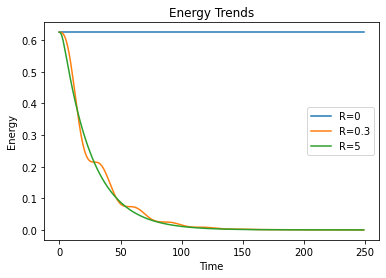

In [28]:
plt.plot(e_1)
plt.plot(e_2)
plt.plot(e_3)
plt.legend(["R=0","R=0.3","R=5"])
plt.title("Energy Trends")
plt.xlabel("Time")
plt.ylabel("Energy")

From the dynamics equation, we can derive,
$$ \varepsilon'(t) = -\frac{R}{L}(y'(t))^2 $$

* When $R=0$, we see that there is no impact on the dynamics of the energy, which is understandable because the derivative becomes $0$.
* When $R=0.3$, earlier, we saw that we had damped oscillations. This is reflected in the energy dynamics as well.
* When $R=5$, earlier, we saw that there were no oscillations, which is also the case in the dynamics of energy.

## $E$ as a function of time

Assuming $R=0$, we end up with an LC circuit, which, as we have seen previously, gives us sustained oscillations.

In [29]:
def Mat(R, L, C):
    A = np.array([[0, 1],
                 [-1/(L*C), -R/L]])
    return A

In [67]:
def RLC_circuit(Y, t, R, L, C, omega):
    A = Mat(R, L, C)
    b = np.array([0, np.cos(omega * t)])
    return np.dot(A, Y) + b

R = 0
L = 0.8
C = 1
omega = 0.6
omega_0 = 1 / np.sqrt(L * C)
omega_1 = 2

t0 = 0
T = 100
dt = 0.1
tt = np.arange(t0, T, dt)

In [68]:
y_1 = spi.odeint(RLC_circuit, Y1, tt, args=(R,L,C,omega))
y_2 = spi.odeint(RLC_circuit, Y1, tt, args=(R,L,C,omega_0))
y_3 = spi.odeint(RLC_circuit, Y1, tt, args=(R,L,C,omega_1))

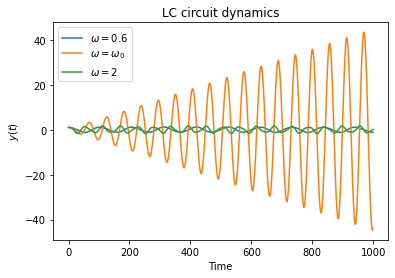

In [69]:
plt.plot(y_1[:, 0])
plt.plot(y_2[:, 0])
plt.plot(y_3[:, 0])
plt.title("LC circuit dynamics")
plt.xlabel("Time")
plt.ylabel("$y(t)$")
plt.legend(["$\omega=0.6$", "$\omega = \omega_0$", "$\omega = 2$"])

We observe a change in the voltage of the system in case of the system with resonant frequency. This phenomenon is called voltage magnification and is seen in series RLC circuits. In parallel RLC circuits, current magnification is found.